# Tuning K-Means

In [129]:
import pandas as pd
import numpy as np
import random
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.offline as py 
py.init_notebook_mode(connected=True) 
import plotly.graph_objs as go 
import plotly.tools as tls 
import warnings 
from collections import Counter 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [130]:
def KMENAS(data):
    """
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(data);
    val = pd.crosstab(labels,kmeans.labels_).values
    print("Bad Clients predicted Good : {1:2.2f}% \nGood Clients predicted Bad : {0:2.2f}% ".format(bcpg,gcpb))
    return pd.crosstab(labels,kmeans.labels_)
    """

In [131]:
def KMENASpp(data):
    kmeans = KMeans(n_clusters=2,random_state=5081)
    kmeans.fit(data);
    val = pd.crosstab(labels,kmeans.labels_).values
    x1,x2,x3,x4 = val[0][0],val[0][1],val[1][0],val[1][1]
    #print(val[0].argmax()) #Colonne du cluster dominant selon la target good
    cl_0 = [x1,x3]
    cl_1 = [x2,x4]
    cl = [cl_0,cl_1]
    if x1+x3 < x2+x4 :
        bcpg = x1/(x1+x2)
        gcpb = x4/(x4+x3)
    else:
        bcpg = x3/(x3+x4)
        gcpb = x2/(x2+x1)
    #print("Bad Clients predicted Good : {1:2.2f}% \nGood Clients predicted Bad : {0:2.2f}% ".format(bcpg,gcpb))
    return pd.crosstab(labels,kmeans.labels_),(bcpg,gcpb)

In [132]:
def randr(n,list):
    choices = []
    if n<20:
        while len(choices) < n :
            selection = random.choice(list)
            if selection not in choices:
                choices.append(selection)
        return choices

In [133]:
data1 = pd.read_csv(r'C:\Users\Brahim\Desktop\prog\ger_data.csv')
labels = data1.iloc[:,-1]   # Enregistrer la varialbe target
data1 = data1.iloc[:,0:-1]; # Enleveer la colonne target
data1 = data1.drop(columns="Tel") # Enlever la colonne tel

ll = list(data1)
len(ll)

19

In [134]:
dropped = []
percentages = []
cross = []
for i in range(1000):
    x = randr(8,ll)
    dropped.append(x)
    #############################################################
    data1 = pd.read_csv(r'C:\Users\Brahim\Desktop\prog\ger_data.csv')
    labels = data1.iloc[:,-1]   # Enregistrer la varialbe target
    data1 = data1.iloc[:,0:-1]; # Enleveer la colonne target
    data1 = data1.drop(columns=["Tel"]) # Enlever la colonne tel
    ####
    data1 = data1.drop(columns= x) 
    #print(len(list(data1)))
    ####

    data_cat = data1.select_dtypes(include=['object'])
    data_cat_og = data1.select_dtypes(include=['object'])
    data_num_og = data1._get_numeric_data()
    data_num = data1._get_numeric_data()

    for col in data_cat:
        onehot = pd.get_dummies(data_cat[col])
        data_cat = data_cat.drop(col,axis = 1)
        data_cat = data_cat.join(onehot)
    if data_num.shape[1] == 0:
        data_num_sc = data_num
    else:
        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()
        data_num_sc = pd.DataFrame(scaler.fit_transform(data_num), columns=data_num.columns)

    data = [data_num_sc,data_cat]
    data_join = pd.concat(data,axis=1)
    
    reduced_data = PCA(n_components=2).fit_transform(data_join)
    reduced_join = pd.DataFrame(reduced_data)
    #KMENAS(reduced_join)
    ##########################################################
    
    a,b = KMENASpp(reduced_join)
    percentages.append(b)
    cross.append(a)
    #print(i)

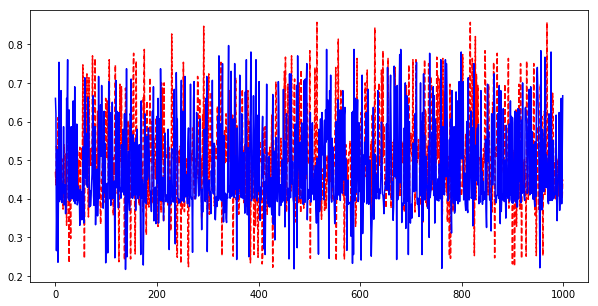

In [136]:
ppp = [i for i in range(1000)]
sss = []
for per in percentages:
    sss.append(list(per))
sss = np.array(sss)
plt.figure(figsize=(10,5))
plt.plot(ppp,sss[:,0],'r--',ppp,sss[:,1],'b')

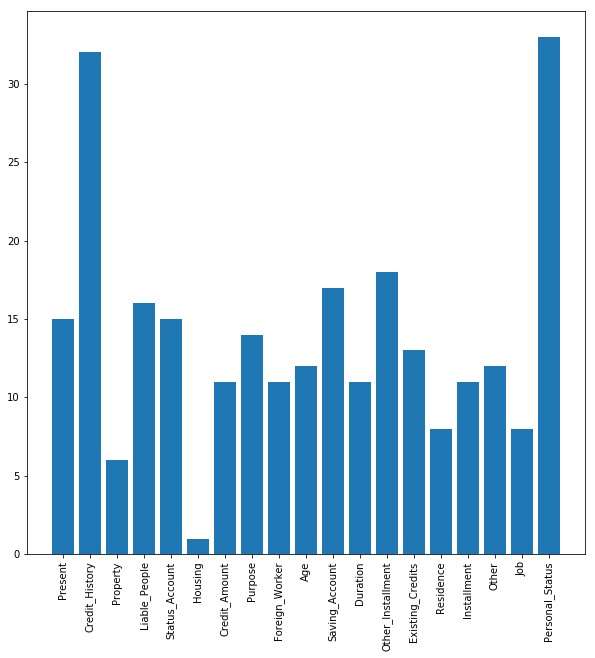

In [137]:
k=0
l=[]
for i in sss:
    if i[1]<0.3:
        l.append(k)
    k=k+1

dropped_flat = [item for sub in dropped for item in sub]

k=0
dropped_2 = []
for sub in dropped:
    if k in l:
        dropped_2.append(dropped[k])
    k=k+1
    
dropped_flat = [item for sub in dropped_2 for item in sub]
dropped_set = set(dropped_flat)
########
count = []
for el in dropped_set:
    count.append(dropped_flat.count(el))
########
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,10),)
plt.bar(list(dropped_set),count);
plt.xticks(rotation='vertical')
plt.show()

In [138]:
dropped[194]
percentages[194]
cross[194]

col_0,0,1
Actual_Score,,
1,460,240
2,167,133


In [139]:
dropped[78]
percentages[78]
cross[78]

col_0,0,1
Actual_Score,,
1,289,411
2,229,71
